In [1]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
import PIL
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [4]:
# Importing the resnet 50 structure 
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
# didn't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
# useful for getting number of output classes
folders = glob('Datasets/train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
61/61 [==============================] - 276s 5s/step - loss: 2.8492 - accuracy: 0.3875 - val_loss: 1.3213 - val_accuracy: 0.7778
Epoch 2/20
61/61 [==============================] - 260s 4s/step - loss: 1.0341 - accuracy: 0.5838 - val_loss: 0.8263 - val_accuracy: 0.6667
Epoch 3/20
61/61 [==============================] - 300s 5s/step - loss: 1.0107 - accuracy: 0.5930 - val_loss: 1.0956 - val_accuracy: 0.6111
Epoch 4/20
61/61 [==============================] - 274s 4s/step - loss: 0.9127 - accuracy: 0.6330 - val_loss: 0.7709 - val_accuracy: 0.7222
Epoch 5/20
61/61 [==============================] - 293s 5s/step - loss: 1.2741 - accuracy: 0.5777 - val_loss: 0.7495 - val_accuracy: 0.6667
Epoch 6/20
61/61 [==============================] - 323s 5s/step - loss: 0.8426 - accuracy: 0.6725 - val_loss: 0.9757 - val_accuracy: 0.6111
Epoch 7/20
61/61 [==============================] - 348s 6s/step - loss: 0.686

In [20]:
import matplotlib.pyplot as plt

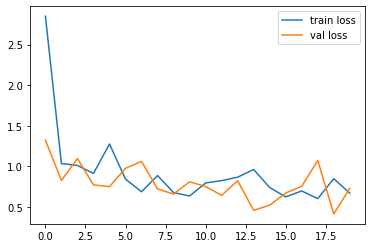

<Figure size 432x288 with 0 Axes>

In [21]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

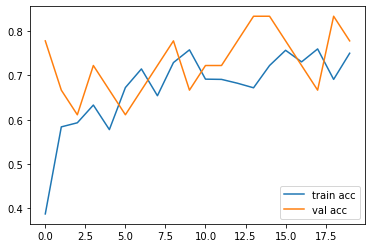

<Figure size 432x288 with 0 Axes>

In [22]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [23]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

In [24]:
y_pred = model.predict(test_set)

In [25]:
y_pred

array([[3.5919203e-07, 1.6364892e-07, 9.9981898e-01, 1.8060407e-04],
       [3.3548069e-05, 1.2299541e-04, 9.9708134e-01, 2.7620932e-03],
       [1.4407677e-02, 3.8480005e-01, 5.7712711e-02, 5.4307956e-01],
       [9.4741195e-01, 1.2129878e-05, 4.2711165e-02, 9.8647904e-03],
       [4.0159421e-04, 6.1831826e-01, 7.5646073e-02, 3.0563411e-01],
       [4.0384661e-03, 3.4951282e-01, 5.2095336e-01, 1.2549540e-01],
       [5.5173718e-05, 2.5666449e-02, 1.0188933e-02, 9.6408945e-01],
       [2.2445484e-04, 3.6953449e-02, 5.2200209e-02, 9.1062188e-01],
       [3.5227809e-04, 3.4118997e-04, 9.9064481e-01, 8.6617023e-03],
       [1.0871222e-04, 6.3500449e-02, 3.9449390e-02, 8.9694142e-01],
       [3.3187936e-04, 7.8917098e-01, 9.6895754e-02, 1.1360134e-01],
       [7.9898207e-05, 7.0173229e-07, 9.9991333e-01, 6.0672705e-06],
       [2.9642569e-04, 9.6145356e-01, 4.4124652e-04, 3.7808787e-02],
       [1.6359225e-01, 4.7124386e-01, 7.4578606e-02, 2.9058531e-01],
       [3.2434094e-04, 7.7564168e-

In [26]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [27]:
y_pred

array([2, 2, 3, 0, 1, 2, 3, 3, 2, 3, 1, 2, 1, 1, 1, 2, 3, 3], dtype=int64)